# <div align="center" style="color: blue"> COSC 2793 | Machine Learning </div>
## <div align="center" style="color: blue"> Assignment 1</div>
## <div align="center" style="color: blue"> Wing Hang Chan - S3939713</div>

##  Step 1. Import libraries:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns

from sklearn.base import TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder

import warnings
warnings.filterwarnings('ignore')

----

##  Step 2. Exploratory Data Analysis (EDA)

#### a. Read data set

In [2]:
# To read data set from a csv file
raw_df = pd.read_csv('./dataset/Data_Set.csv')

# To show the first 5 columns
raw_df.head()

,ID,TARGET_LifeExpectancy,Country,Year,Company_Status,Company_Confidence,Company_device_confidence,Device_confidence,Device_returen,Test_Fail,...,ISO_23,TotalExpenditure,STRD_DTP,Engine_failure,GDP,Product_Quantity,Engine_failure_Prevalence,Leakage_Prevalence,IncomeCompositionOfResources,RD
0,1,67.1,146,2017,0,263,262,264,62,0.01,...,6,8.16,65.0,0.1,654.37,33736494,17.2,17.3,0.479,3.178050
1,2,59.8,146,2016,0,271,278,264,64,0.01,...,58,8.18,62.0,0.1,686.22,327582,17.5,17.5,0.476,3.162278
2,3,57.6,146,2015,0,268,246,290,66,0.01,...,62,8.13,64.0,0.1,707.55,31731688,17.7,17.7,0.470,3.146427
3,4,55.5,146,2014,0,272,248,296,69,0.01,...,67,8.52,67.0,0.1,750.35,3696958,17.9,18.0,0.463,3.130495
4,5,57.7,146,2013,0,275,278,272,71,0.01,...,68,7.87,68.0,0.1,71.16,2978599,18.2,18.2,0.454,3.082207


#### b. Check with size

In [3]:
# To show the number of attributes and tuples of the data set
raw_df.shape

(2071, 24)

Dataset consists of 24 columns and 2071 rows
From metadata.txt, ID is a row index and not an attribute. `TARGET-LifeExpectancy` is the target variable.


#### c. Change column name

There may be some typos of column name `Country` and `Device_returen`.
As confirmed from course coordinator and tutors, two columns will be changed, `Country` to `Company` and `Device_returen` to `Device_return`

In [4]:
# to change name of 2 columns
df = raw_df.rename(columns={"Country": "Company", "Device_returen": "Device_return"}, inplace=False)

#### d. Explore data set

In [5]:
# to show data type of the attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071 entries, 0 to 2070
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            2071 non-null   int64  
 1   TARGET_LifeExpectancy         2071 non-null   float64
 2   Company                       2071 non-null   int64  
 3   Year                          2071 non-null   int64  
 4   Company_Status                2071 non-null   int64  
 5   Company_Confidence            2071 non-null   int64  
 6   Company_device_confidence     2071 non-null   int64  
 7   Device_confidence             2071 non-null   int64  
 8   Device_return                 2071 non-null   int64  
 9   Test_Fail                     2071 non-null   float64
 10  PercentageExpenditure         2071 non-null   float64
 11  Engine_Cooling                2071 non-null   int64  
 12  Gas_Pressure                  2071 non-null   float64
 13  Obs

All records are in integer or float format, and they have no empty value which is mentioned in assignment specification.

#### e. show statistical data

In [6]:
# to show some basic statistics information of the dataset
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 30)
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,2071.0,1.036000e+03,5.979905e+02,1.00,518.500000,1036.000000,1.553500e+03,2.071000e+03
TARGET_LifeExpectancy,2071.0,6.927451e+01,9.482281e+00,37.30,63.000000,71.200000,7.600000e+01,9.270000e+01
Company,2071.0,9.536021e+01,5.486164e+01,0.00,50.000000,94.000000,1.440000e+02,1.920000e+02
Year,2071.0,2.009519e+03,4.614147e+00,2002.00,2006.000000,2010.000000,2.014000e+03,2.017000e+03
Company_Status,2071.0,1.854177e-01,3.887299e-01,0.00,0.000000,0.000000,0.000000e+00,1.000000e+00
Company_Confidence,2071.0,1.628339e+02,1.188722e+02,1.00,74.000000,144.000000,2.280000e+02,6.990000e+02
Company_device_confidence,2071.0,1.619083e+02,1.194422e+02,0.00,74.000000,142.000000,2.280000e+02,7.040000e+02
Device_confidence,2071.0,1.637595e+02,1.188003e+02,2.00,74.000000,144.000000,2.300000e+02,7.220000e+02
Device_return,2071.0,3.307967e+01,1.358329e+02,0.00,0.000000,3.000000,2.200000e+01,1.800000e+03
Test_Fail,2071.0,4.696379e+00,4.205888e+00,0.01,0.615000,3.830000,7.840000e+00,1.787000e+01


In [7]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

From the above description table of the dataset, there are some attributes are not normally distributed. The differences of mean value and the median (50%) are large. There will be a deep investigation in data-preprocessing. e.g. `Device_return`, `PercentageExpenditure`, `Engine_Cooling`, `Obsolescence`, `Engine_failure`, `GDP` & `Product_Quantity`.

#### f. check with Categorical attributes:

There is 1 attribute, i.e. `Company_Status`, stated as categorical attribute.
However, there should have more such as `Year` and `RD`. Both of them have many records in same values.

In [8]:
print(f"No. of unique Company Status: {len(df['Year'].unique())}")
df['Company_Status'].value_counts()

No. of unique Company Status: 16


0    1687
1     384
Name: Company_Status, dtype: int64

In [9]:
print(f"No. of unique Year: {len(df['Year'].unique())}")
print(f"Company Count Distinct with 16 records: {df['Company'].value_counts().loc[lambda x: x == 16].shape[0]}")
print(f"Company Count Distinct with only 1 record: {df['Company'].value_counts().loc[lambda x: x == 1].shape[0]}")
df['Year'].value_counts()

No. of unique Year: 16
Company Count Distinct with 16 records: 129
Company Count Distinct with only 1 record: 7


2015    136
2017    129
2016    129
2014    129
2013    129
2012    129
2011    129
2010    129
2009    129
2008    129
2007    129
2006    129
2005    129
2004    129
2003    129
2002    129
Name: Year, dtype: int64

In [10]:
print(f"No. of unique RD: {len(df['RD'].unique())}")
df['RD'].value_counts().head()

No. of unique RD: 160


3.065942    125
3.535534     38
3.591657     36
3.420526     36
3.449638     35
Name: RD, dtype: int64

Check with the only categorical variable, `Company_Status` stated in metadata.txt
- There are 1687 of '0' values and 384 of '1' values which representing Developed or Developing status. No conflict between data and metadata.
- There are total 16-year records. With most of the years share the same value of record except 2015.
    - Data are from 2002 to 2017 which almost every year has the same 129 records
    - Year 2015 with 136 records
- There are 160 unique records of `RD` which consider with the total no. of records (2071). It is about 7.7% and there is a value which have 125 same records. Although the values are in float format. But, considering there is so much similarity. It will be considered as a categorical variable.

In [11]:
print(f"Company Count Distinct: {len(df['Company'].unique())}")
print(f"Company Count Distinct with 16 records: {df['Company'].value_counts().loc[lambda x: x == 16].shape[0]}")
print(f"Company Count Distinct with only 1 record: {df['Company'].value_counts().loc[lambda x: x == 1].shape[0]}")

Company Count Distinct: 136
Company Count Distinct with 16 records: 129
Company Count Distinct with only 1 record: 7


There are total 136 companies in the dataset. 129 of them have 16 records which is same as the total number of years.
However, there are 7 companies having 1-year record only.

The table below shows all 7 companies with only 1-year record.

In [12]:
# group dataframe by `Company` and show it with count of `Company` is 1
df2 = df.groupby(['Company']).ID.count() == 1
df2 = df2.reset_index()
df[df['Company'].isin(df2[df2['ID'] == True]['Company'])]

,ID,TARGET_LifeExpectancy,Company,Year,Company_Status,Company_Confidence,Company_device_confidence,Device_confidence,Device_return,Test_Fail,PercentageExpenditure,Engine_Cooling,Gas_Pressure,Obsolescence,ISO_23,TotalExpenditure,STRD_DTP,Engine_failure,GDP,Product_Quantity,Engine_failure_Prevalence,Leakage_Prevalence,IncomeCompositionOfResources,RD
512,513,60.4,29,2015,0,63,62,64,0,0.01,11.419555,0,58.4,0,96,5.58,96.0,0.1,809.49,127445,2.7,2.6,0.721,3.563706
1217,1218,57.7,73,2015,0,63,58,68,0,0.01,871.878317,0,81.6,0,79,17.24,79.0,0.1,4051.88,127445,0.1,0.1,0.463,0.000000
1330,1331,59.3,152,2015,0,63,58,68,0,0.01,15.606596,0,87.3,0,87,4.65,87.0,0.1,152.53,127445,0.1,0.1,0.463,3.098387
1395,1396,57.3,173,2015,0,63,60,66,0,0.01,0.000000,0,77.3,0,99,7.20,99.0,0.1,413.73,127445,0.1,0.1,0.463,3.065942
1428,1429,62.7,119,2015,0,63,64,62,0,0.49,344.690631,0,83.3,0,99,9.27,99.0,0.1,2163.98,292,0.1,0.1,0.779,3.768289
1589,1590,60.4,85,2015,0,63,66,60,0,0.01,0.000000,0,17.5,0,69,6.50,69.0,0.1,413.73,127445,1.3,1.3,0.463,3.885872
1894,1895,59.3,92,2015,0,63,60,66,0,0.01,78.281203,0,79.3,0,9,16.61,9.0,0.1,3967.19,1819,0.2,0.1,0.463,0.000000


#### g. Histogram for Attributes
To show distribution of each attributes

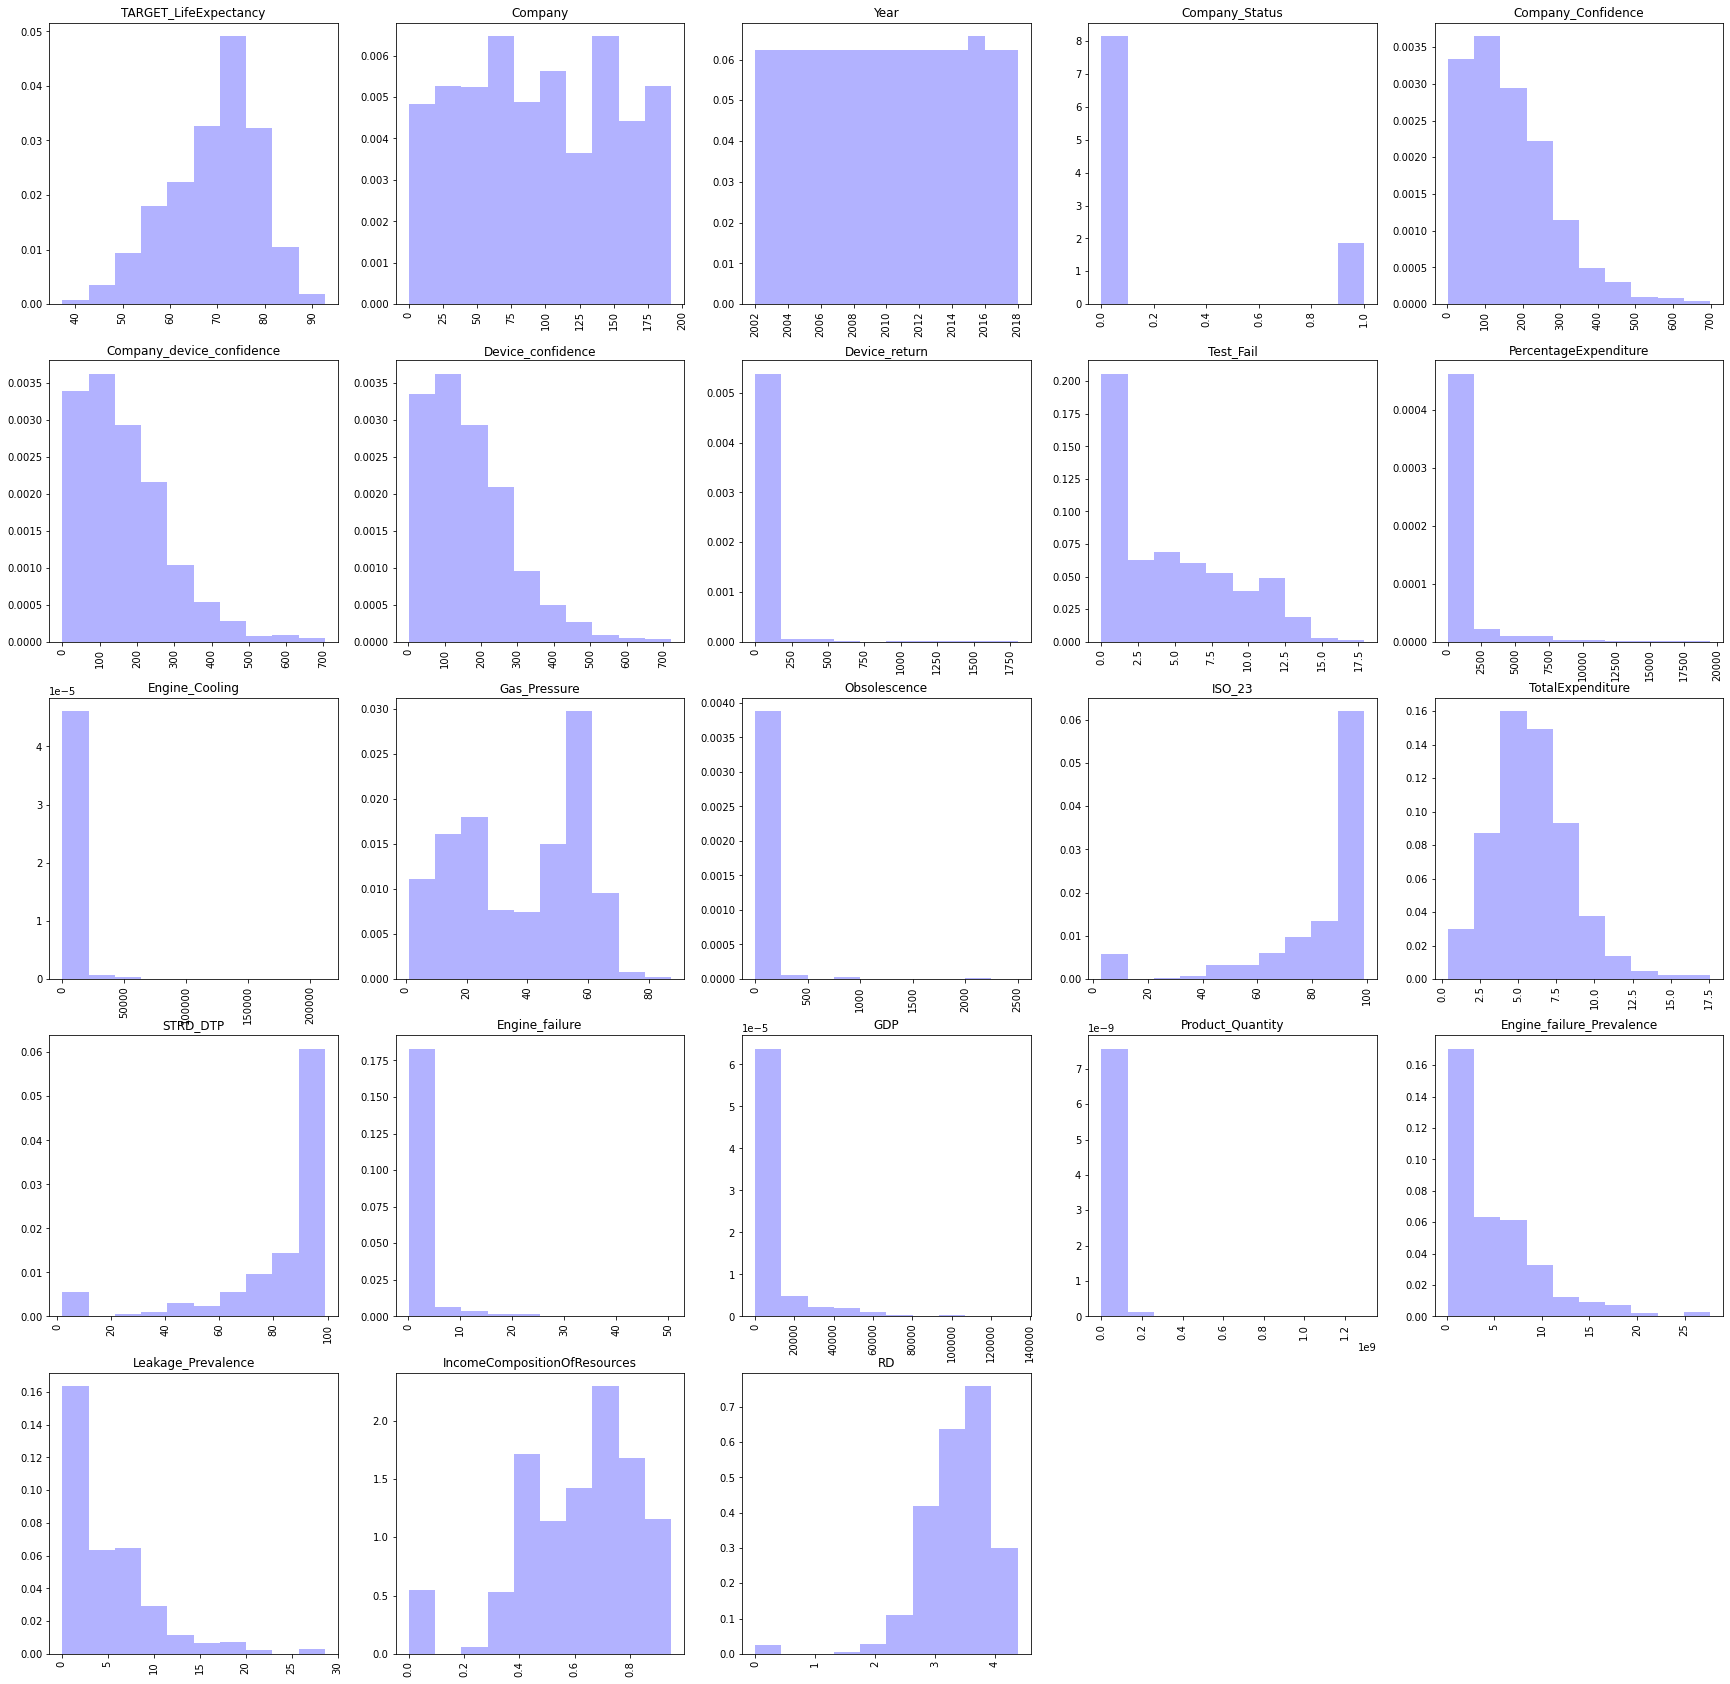

In [13]:
plt.figure(figsize=(30,30))
# for histogram of `Year`
year_bin = [2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]
for i, col in enumerate(df.columns):
    # only include attributes
    if col != 'ID':
        # plot all histograms 5x5
        plt.subplot(5,5,i)
        # put bins for better visualization as the auto one will combine 2-year together
        if col != 'Year':
            plt.hist(df[col], alpha=0.3, color='b', density=True)
        else:
            plt.hist(df[col], alpha=0.3, color='b', bins=year_bin, density=True)
        plt.title(col)
        plt.xticks(rotation='vertical')
# ref: Week2_lab_exercises.ipynb

From the above histograms, we can see the target variable `TARGET_LifeExpectancy` is nearly normal distributed but with a little bit left-skewed. `Year` and `Company_status` share the same view of mentioned in above section.
For other variables, they have different distribution which most of them are not normally distributed. Moreover, there are some attributes are very similar in distributions shape, such as `Company_Confidence`, `Company_device_confidence` and `device_confidence`, `Engine_failure_Prevalence` and `Leakage_Prevalence`, `Obsolescence` and `Device_return`, `GDP` and `PercentageExpenditure` and `STRD_DTP` and `ISO_23`. The coefficient will be shown in the heatmap in next few steps.

#### h. Scatter plot for Attributes
To show relationship between Target variable and each attributes


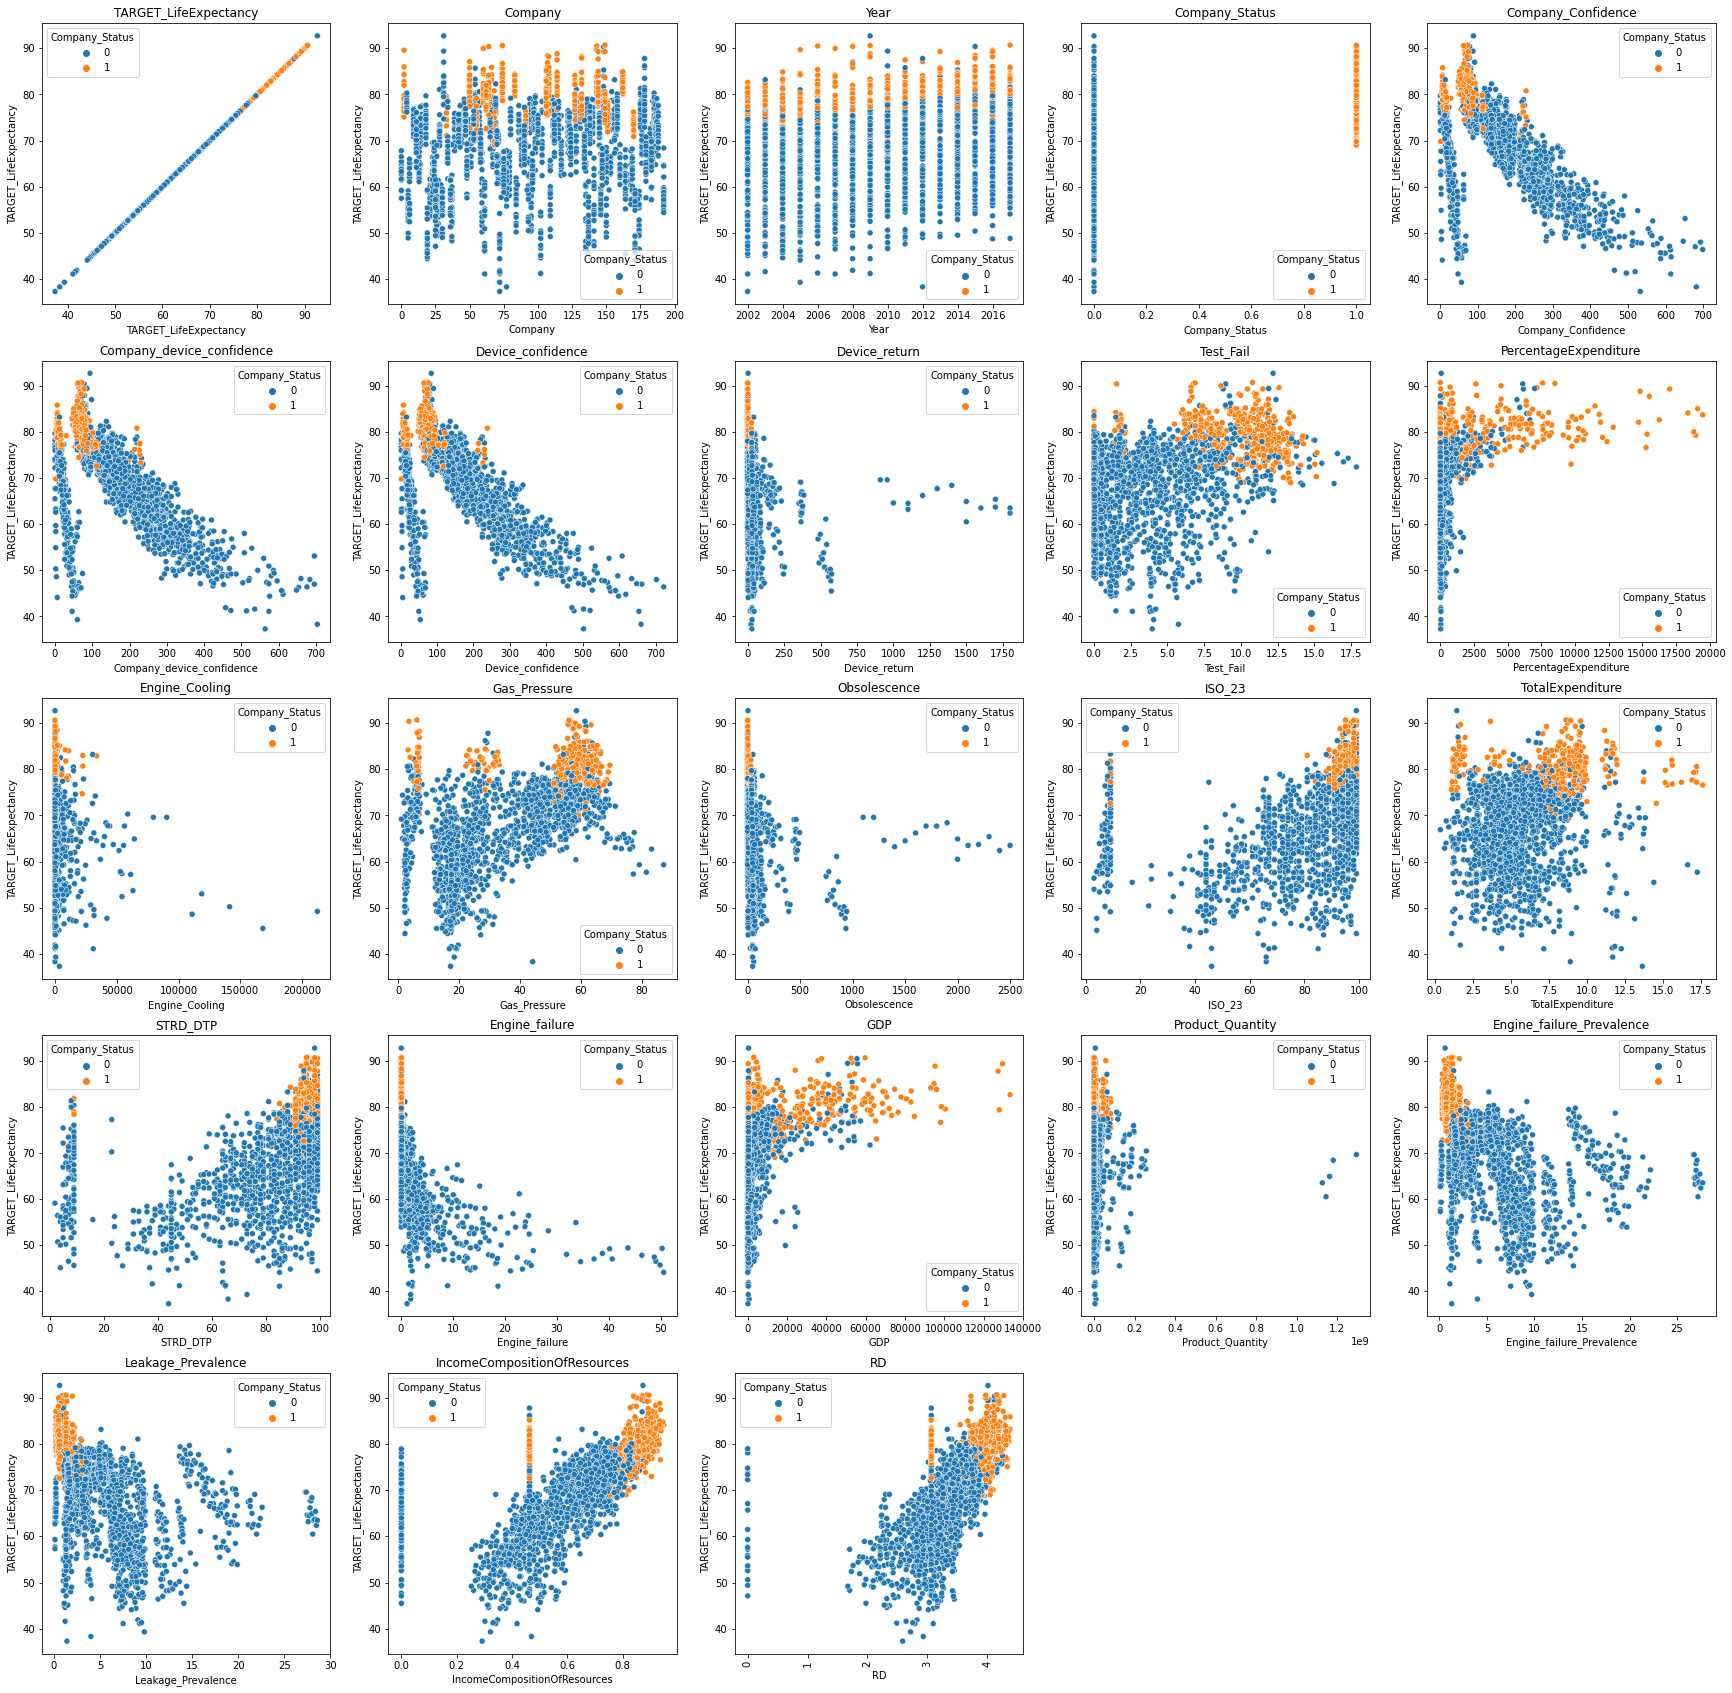

In [14]:
plt.figure(figsize=(30,30))
for i, col in enumerate(df.columns):
    if col != 'ID':
        plt.subplot(5,5,i)
        # color by `Company_Status` as it is the only categorical variable stated in the specification
        sns.scatterplot(data=df, x=col, y='TARGET_LifeExpectancy', hue='Company_Status')
        plt.title(col)

plt.xticks(rotation='vertical')
plt.show()
# ref: Week2_lab_exercises.ipynb

#### Observation from Scatter:
- The three confidences, `Company_Confidence`, `Company_device_confidence` and `device_confidence`, and the target are mainly divided into two classes. One class is a clear linear regression relationship and the other class is a polynomial regression relationship.
- `Obsolescence` and `Device_return` may have some outliers or some outer classes.
- `Product_Quantity` may have outliers.
`STRD_DTP` and `ISO_23` have two classes.
- There may be a linear relationship for `IncomeCompositionOfResources` and `RD` if not considering the data point of 0.
- There are attributes which have >1000 values for per 1000 samples which may be considered as outliers
- There are attributes with many zero value which need further investigation.
- Records with `Company_Status` = 1 have generally high value of target value. But, seems there is no pattern.


#### i. Heatmap

[Text(0.5, 0, 'ID'),
 Text(1.5, 0, 'TARGET_LifeExpectancy'),
 Text(2.5, 0, 'Company'),
 Text(3.5, 0, 'Year'),
 Text(4.5, 0, 'Company_Status'),
 Text(5.5, 0, 'Company_Confidence'),
 Text(6.5, 0, 'Company_device_confidence'),
 Text(7.5, 0, 'Device_confidence'),
 Text(8.5, 0, 'Device_return'),
 Text(9.5, 0, 'Test_Fail'),
 Text(10.5, 0, 'PercentageExpenditure'),
 Text(11.5, 0, 'Engine_Cooling'),
 Text(12.5, 0, 'Gas_Pressure'),
 Text(13.5, 0, 'Obsolescence'),
 Text(14.5, 0, 'ISO_23'),
 Text(15.5, 0, 'TotalExpenditure'),
 Text(16.5, 0, 'STRD_DTP'),
 Text(17.5, 0, 'Engine_failure'),
 Text(18.5, 0, 'GDP'),
 Text(19.5, 0, 'Product_Quantity'),
 Text(20.5, 0, 'Engine_failure_Prevalence'),
 Text(21.5, 0, 'Leakage_Prevalence'),
 Text(22.5, 0, 'IncomeCompositionOfResources'),
 Text(23.5, 0, 'RD')]

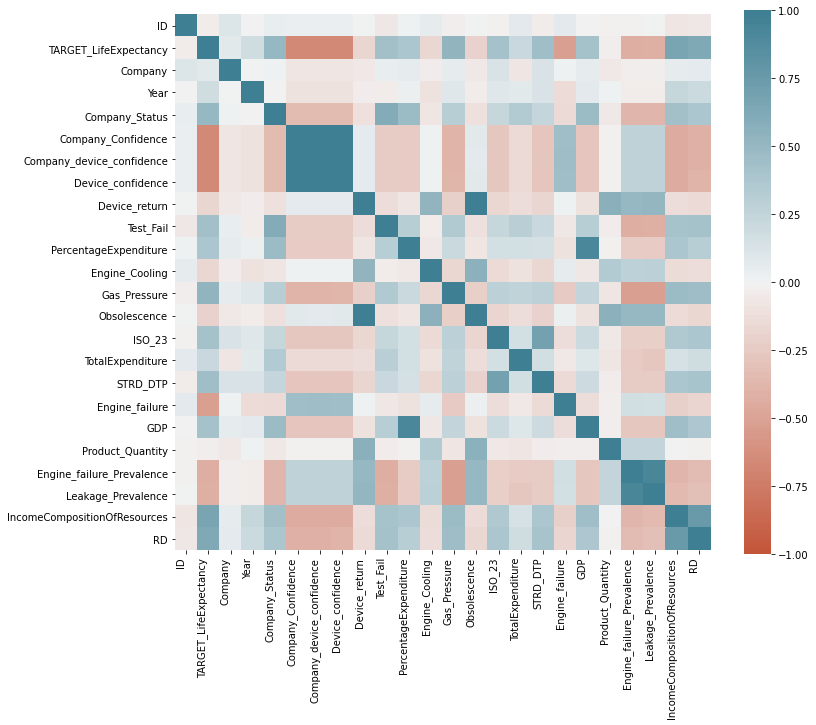

In [15]:
f, ax = plt.subplots(figsize=(12, 10))
corr = df.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
)
# ref: Week2_lab_exercises.ipynb

Observation:
- The three confidences, "`Company_Confidence`, `Company_device_confidence` and `device_confidence`", and the two prevalence, "`Engine_failure_Prevalence` and `Leakage_Prevalence`", are highly co-related. But by considering their names, it is believed that they are relevant.
- Three pairs of attributes, `Obsolescence` and `Device_return`, `GDP` and `PercentageExpenditure`, `STRD_DTP` and `ISO_23`, have high correlation.
`IncomeCompositionOfResources` and RD have a high positive correlation with the target variable and `Company_Confidence`, `Company_device_confidence` and `device_confidence` have a high negative correlation.



---

## Step 3: Data Splitting

From EDA, it is known that the dataset is about some information for particular companies over the years (2002-2017). There are two categories of companies, developed or developing.

It could be believed that new data coming year by year with all companies. Therefore, Time series split is chosen for splitting data.

Data will be sorted by `Year` and `Company`. Then, data would be split by time. There are 16 years record. Split dataset info 75-25, i.e. 12 years training and 4 year testing.

It would be split into 3 for training set which has the same size of the test set.

Data split with TimeSeriesSplit by Year

ref: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html

In [16]:
# to sort the dataset with Year for TimeSeriesSplit. 
# 2nd sort criteria Company is for better data visualization.
df_sorted = df.sort_values(["Year", "Company"])
# each year value count
year_df = df['Year'].value_counts()

# sort the dict with Year
year_count_dict = dict(sorted(year_df.to_dict().items()))
# calculate the sum of last 4-year value count as test size
# as there are some unbalanced data with `Year` spotted from EDA
test_size = np.sum(list(year_count_dict.values())[-4:])

# drop non attribute and target value for training set
X = df_sorted.drop(['ID','TARGET_LifeExpectancy'], axis=1)
y = df_sorted['TARGET_LifeExpectancy']

# create time series split of training and testing set with test size
tscv = TimeSeriesSplit(n_splits=2, test_size=test_size)

# as TimeSeriesSplit does not have n_split=1,
# therefore use n_splits=2 and use the last split as splitting training and testing set.
for i, (train_index, test_index) in enumerate(tscv.split(df_sorted)):
    pass

X_train, X_test = X.iloc[train_index], X.iloc[test_index]
y_train, y_test = y.iloc[train_index], y.iloc[test_index]

print(f'X_train: {X_train.shape}, X_test: {X_test.shape}' )
print(f'y_train: {y_train.shape}, y_test: {y_test.shape}' )

X_train: (1548, 22), X_test: (523, 22)
y_train: (1548,), y_test: (523,)


A check on the splitting is according to `Year`.

In [17]:

print(f"Training set:\n{X_train['Year'].value_counts()}")
print(f"Testing set:\n{X_test['Year'].value_counts()}")

Training set:
2002    129
2003    129
2004    129
2005    129
2006    129
2007    129
2008    129
2009    129
2010    129
2011    129
2012    129
2013    129
Name: Year, dtype: int64
Testing set:
2015    136
2014    129
2016    129
2017    129
Name: Year, dtype: int64


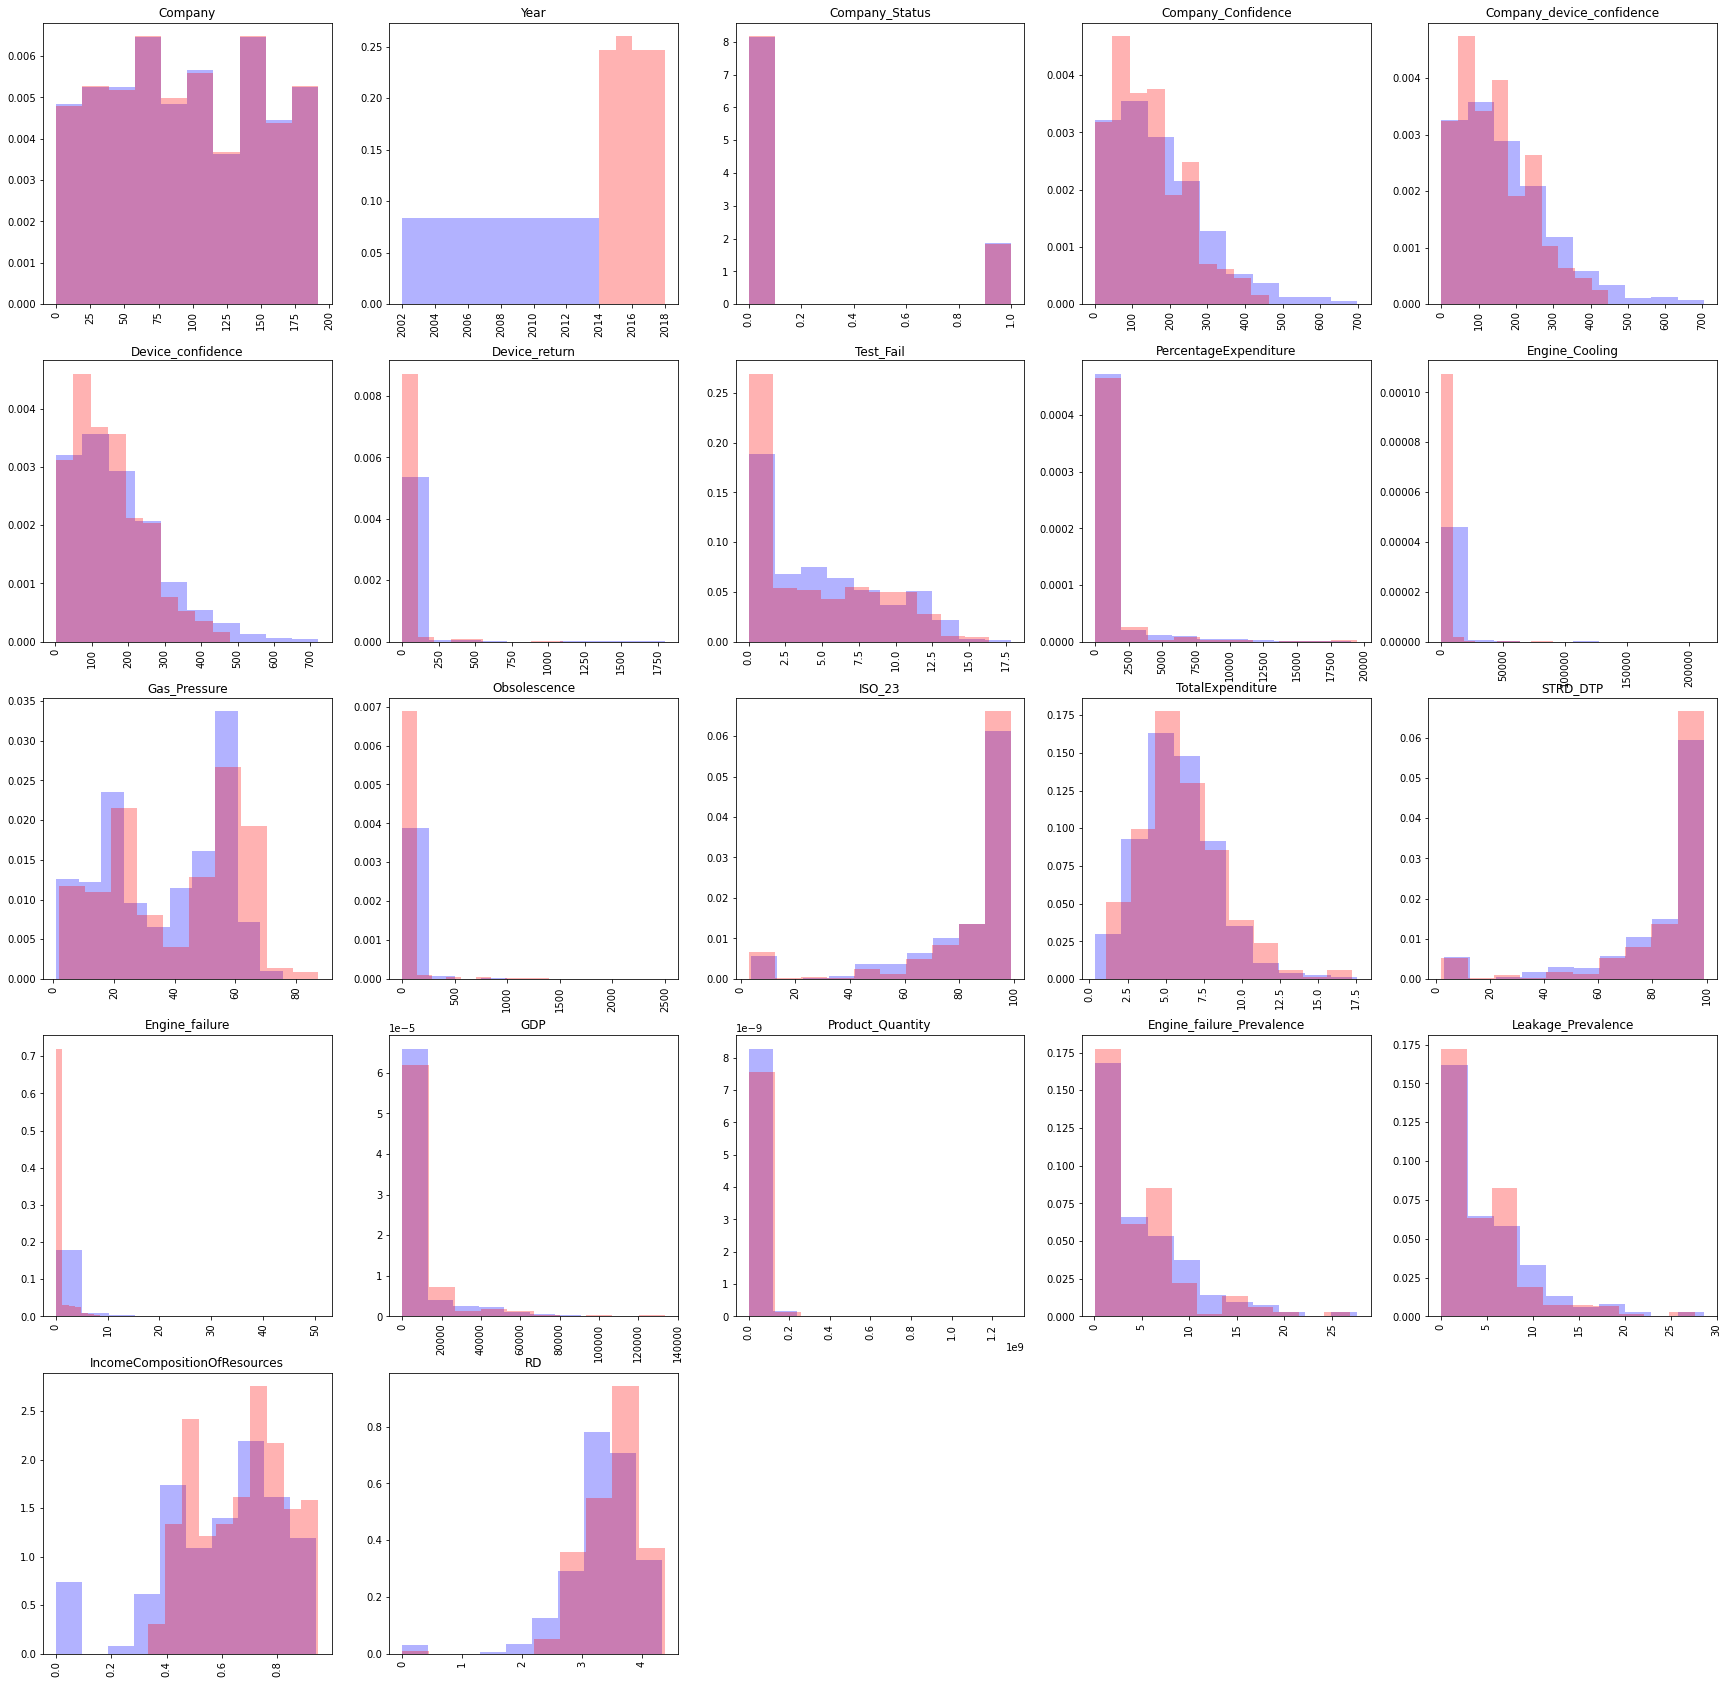

In [18]:
plt.figure(figsize=(30,30))
# for histogram of `Year`
year_bin = [2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]
for i, col in enumerate(X_train.columns):
    # only include attributes
    if col != 'ID':
        # plot all histograms 5x5
        plt.subplot(5,5,i+1)
        # put bins for better visualization as the auto one will combine 2-year together
        if col != 'Year':
            plt.hist(X_train[col], alpha=0.3, color='b', density=True)
            plt.hist(X_test[col], alpha=0.3, color='r', density=True)
        else:
            plt.hist(X_train[col], alpha=0.3, color='b', bins=year_bin, density=True)
            plt.hist(X_test[col], alpha=0.3, color='r', bins=year_bin, density=True)
        plt.title(col)
        plt.xticks(rotation='vertical')
# ref: Week2_lab_exercises.ipynb

- The above diagrams show the distribution of training and testing set shown in blue and red respectively.
- It could be concluded that the distribution of each variable are nearly the same.
- It also proved the assumption of using the time series split stands.

----

## Step 4: Data Preprocessing

There is no null value shown in EDA. However, there are lots of outliers and 0 value shown.
They will be pre-processed in the below section.

#### Per thousand Variables
1. `Company_Confidence`
2. `Company_device_confidence`
3. `Device_confidence`
4. `Device_returen`
5. `Engine_Cooling`
6. `Obsolescence`
7. `Engine_failure`

#### Percentage Variables
1. `ISO_23`
2. `TotalExpenditure`
3. `Engine_failure_Prevalence`
4. `Leakage_Prevalence`

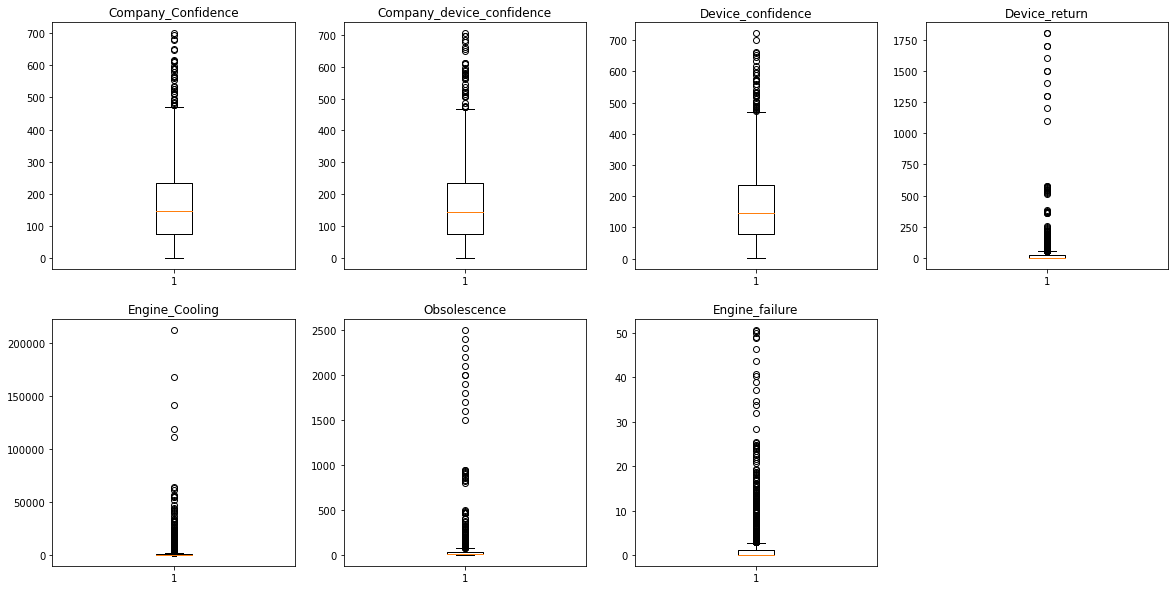

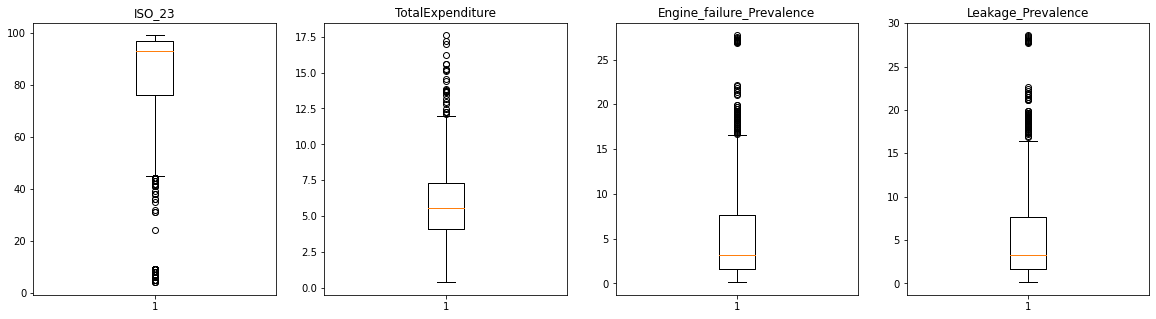

In [19]:
per_thou_list = ['Company_Confidence',
                    'Company_device_confidence',
                    'Device_confidence',
                    'Device_return',
                    'Engine_Cooling',
                    'Obsolescence',
                    'Engine_failure']
perc_list = ['ISO_23',
             'TotalExpenditure',
             'Engine_failure_Prevalence',
             'Leakage_Prevalence']

plt.figure(figsize=(20,10))
i=1
for col in per_thou_list:
    plt.subplot(2,4,i)
    plt.boxplot(X_train[col])
    plt.title(col)
    i+=1
plt.show()

plt.figure(figsize=(20,5))
i=1
for col in perc_list:
    plt.subplot(1,4,i)
    plt.boxplot(X_train[col])
    plt.title(col)
    i+=1
plt.show()

There is no outlier for `Company_Confidence`, `Company_device_confidence`, `Device_confidence`, `Engine_failure` and all percentage variables in the training set.
There are serval outliers for `Device_returen` and `Obsolescence`. Those outliers can be replaced by median as it is numeric variable and this takes the least effect on statistical data.
`Engine_Cooling` has 317 records that exclude the range which is a big number and its largest value is 212183. It is not a good practice that replace those value as there are too many. Normalization is used instead.

The attributes are divided into 6 groups for pre-processing.
1. Confidence Variables:
    - `Company_Confidence`, `Company_device_confidence`, `Device_confidence`
    - Apply outlier replacement by median - Reason 1 & 2
    - Apply 0 replacement by median - Reason 3 & 2
    - Apply MinMaxScaler - Reason 4
2. Per Thousand Variables:
    - `Device_return`, `Obsolescence`, `Engine_failure`
    - Apply outlier replacement by median - Reason 1 & 2
    - No applying 0 replacement, Reason 3 & 2
    - Apply MinMaxScaler - Reason 4
3. Percentage Variables:
    - `ISO_23`, `TotalExpenditure`, `Engine_failure_Prevalence`, `Leakage_Prevalence`
    - Apply outlier replacement by median, as it is restricted by the specification. Although there is no outlier in training set, it is not clear that new data (test set) would have outlier.
    - No applying 0 replacement, as 0 is not rejected by specification and it makes sense to have 0 for those cases
    - Apply MinMaxScaler - Reason 4
4. Other Numeric Variables:
    - `Engine_Cooling`, `PercentageExpenditure`, `Test_Fail`, `Gas_Pressure`, `STRD_DTP`, `GDP`, `IncomeCompositionOfResources`
    - Not applying outlier to those value - Reason 5
    - for `Engine_Cooling` - Reason 6
    - Apply standard scaler - Reason 7
5. Special handling
    - `Product_Quantity`
    - Apply outlier replacement by median - Reason 2
    - Apply standard scaler - Reason 7
6. Categorical Variables:
    - `RD`
    - Apply ordinal encoding - Reason 8

##### Reason
- Reason 1: Although there is no outlier in training set, it is not clear that new data (test set) would have outlier. It is also because those attributes are restricted by the specification.
- Reason 2: Use median as replacement because they are numeric variable and mode is better for categorical variable. Mean will change the distribution of variables, so it is not chosen.
- Reason 3: Although the specification does not reject to have 0 value, it does not make any sense with a 0-value of confidence.
- Reason 4: Apply MinMax Scaler as the specification state their range (0-1000 or 0-100) and outlier are replaced in previous steps.
- Reason 5: the specification does not restrict their or within the value
- Reason 6: there are a large number of outliers, the largest value is 212183. It is not a good practice that replace those value as there are too many. Normalization is used instead.
- Reason 7: Apply normalization as there is no range for those attributes
- Reason 8: although it is numerical value and not specified as categorical variable in the specification,  there are lots of value are the same.

#### Custom Transformer for replacing some value to a specific value for SimpleImputer to replace

In [20]:
class CustomOutlierTransformer(TransformerMixin):
    ''' CustomOutlierTransformer is custom class which has a parent class of TransformerMixin
    The class is to transform some value which larger than 
    a specific value to another specific replaced value. 
    '''
    def __init__(self, x_col_name, outlier_lv, replace_val=9999):
        '''
        initialize with column name and the outlier level
        default replace value to 9999 
        '''
        super(CustomOutlierTransformer, self).__init__()
        self.x_col_name = x_col_name
        self.outlier_lv = outlier_lv
        self.replace_val = replace_val

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X[self.x_col_name].loc[X[self.x_col_name] > self.outlier_lv] = self.replace_val
        return X

#### a. Confidence Variables:

In [21]:
# 1. Confidence Variables:
confidence_var = ['Company_Confidence', 'Company_device_confidence', 'Device_confidence']

# Use pipeline to make it one-by-one
# to change the attributes stated with over 1000 value to 9999
confidence_custom_pipeline = Pipeline([
    ('over1000Outlier-Company_Confidence', CustomOutlierTransformer('Company_Confidence', 1000)),
    ('over1000Outlier-Company_device_confidence', CustomOutlierTransformer('Company_device_confidence', 1000)),
    ('over1000Outlier-Device_confidence', CustomOutlierTransformer('Device_confidence', 1000))
])

# to change the attributes stated with value 9999 to median by over1000Imputer 
# (i.e. changed in custom pipeline)
# to change value 0 to median by zeroValueImputer
# Normalization done by MinMaxScaler with minimum value 0 and maximum value 1000 with scaler
confidence_general_pipeline = Pipeline([
    ('over1000Imputer', SimpleImputer(missing_values=9999, strategy='median')),
    ('zeroValueImputer', SimpleImputer(missing_values=0, strategy='median')),
    ('scaler', MinMaxScaler((0,1000)))
])

#### b. Per Thousand Variables:

In [22]:
# 2. Per Thousand Variables:
perThousand_var = ['Device_return', 'Obsolescence', 'Engine_failure']

# to change the attributes stated with over 1000 value to 9999
perThousand_custom_pipeline = Pipeline([
    ('over1000Outlier-Device_return', CustomOutlierTransformer('Device_return', 1000)),
    ('over1000Outlier-Obsolescence', CustomOutlierTransformer('Obsolescence', 1000)),
    ('over1000Outlier-Engine_failure', CustomOutlierTransformer('Engine_failure', 1000))
])

# to change the attributes stated with value 9999 to median by over1000Imputer 
# (i.e. changed in custom pipeline)
# Normalization done by MinMaxScaler with minimum value 0 and maximum value 1000 with scaler
perThousand_general_pipeline = Pipeline([
    ('over1000Imputer', SimpleImputer(missing_values=9999, strategy='median')),
    ('scaler', MinMaxScaler((0,1000)))
])

#### c. Percentage Variables:

In [23]:
#3. Percentage Variables:
percentage_var = ['ISO_23', 'TotalExpenditure', 'Engine_failure_Prevalence', 'Leakage_Prevalence']

# to change the attributes stated with over 100 value to 9999
percentage_custom_pipeline = Pipeline([
    ('over100Outlier-ISO_23', CustomOutlierTransformer('ISO_23', 100)),
    ('over100Outlier-TotalExpenditure', CustomOutlierTransformer('TotalExpenditure', 100)),
    ('over100Outlier-Engine_failure_Prevalence', CustomOutlierTransformer('Engine_failure_Prevalence', 100)),
    ('over100Outlier-Leakage_Prevalence', CustomOutlierTransformer('Leakage_Prevalence', 100))
])

# to change the attributes stated with value 9999 to median by over100Imputer 
# (i.e. changed in custom pipeline)
# Normalization done by MinMaxScaler with minimum value 0 and maximum value 100 with scaler
percentage_general_pipeline = Pipeline([
    ('over100Imputer', SimpleImputer(missing_values=9999, strategy='median')),
    ('scaler', MinMaxScaler((0,100)))
])

#### d. Other Numeric Variables:

In [24]:
# 4. Other Numeric Variables:
normalization_var = ['PercentageExpenditure', 'Test_Fail', 'Gas_Pressure', 'STRD_DTP' 
                     ,'GDP', 'IncomeCompositionOfResources']

#### e. Special Handling `Product_Quantity`

In [25]:
# 5. `Product_Quantity`
prodQuan_var = ['Product_Quantity']

# to change the attributes stated with over 1000000000 value to 9999999999
prodQuan_custom_pipeline = Pipeline([
    ('outlier-productQuantity', CustomOutlierTransformer('Product_Quantity', 1000000000, 9999999999))
])

# to change the attributes stated with value 9999999999 to median by outlierImputer 
# (i.e. changed in custom pipeline)
# Normalization done by StandardScaler
prodQuan_general_pipeline = Pipeline([
    ('outlierImputer', SimpleImputer(missing_values=9999999999, strategy='median')),
    ('scaler', StandardScaler())
])

#### f. Categorical Variables:

In [26]:
# 6. Categorical Variables:
encoding_var = ['RD']

----

## Step 5: Modelling & Regularization

#### Combining of all attribute pipelines into a main pipeline
#### with using LASSO model (L1 regularization)

In [27]:
'''
ColumnTransformer  vs Pipeline:
parallel run and transform column only
ref: https://www.freecodecamp.org/news/machine-learning-pipeline/
ref: https://towardsdatascience.com/clean-efficient-data-pipelines-with-pythons-sklearn-2472de04c0ea

remainder = By specifying remainder='passthrough', to keep all other attributes
n_jobs = -1 means using all processors.
verbose = If True, the time elapsed while fitting each transformer will be printed as it is completed.
verbose_feature_names_outbool = If True, get_feature_names_out will prefix all feature 
names with the name of the transformer that generated that feature
    - for finding the coefficient of the model
ref: https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html
'''

all_ColTransformer = ColumnTransformer([
    ('confidence_column_transformer', confidence_general_pipeline, confidence_var),
    ('perThousand_column_transformer', perThousand_general_pipeline, perThousand_var),
    ('percentage_column_transformer', percentage_general_pipeline, percentage_var),
    ('standard_column_transformer', StandardScaler(), normalization_var),
    ('prodQuan_general_pipeline', prodQuan_general_pipeline, prodQuan_var),
    # handle_unknown='use_encoded_value' means use some value to replace some value not seen
    # unknown_value=-1 means if there is unknown value, 
    # it will be assigned as np.nan if handle_unknown set as 'use_encoded_value'
    # ref: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), encoding_var)
], remainder='passthrough', n_jobs=-1, verbose=True, verbose_feature_names_out=True)

pipeline =  Pipeline([
    ('confidence_custom_pipeline', confidence_custom_pipeline),
    ('perThousand_custom_pipeline', perThousand_custom_pipeline),
    ('percentage_custom_pipeline', percentage_custom_pipeline),
    ('prodQuan_custom_pipeline', prodQuan_custom_pipeline),
    ('all_column_transformer', all_ColTransformer),
    # use LASSO, no dropping value restriction from the specification,
    # use LASSO to punish some attributes which are not correlated with target value
    ('model', Lasso(random_state = 1))
])

- LASSO model is chosen because no dropping value restriction from the specification.
- LASSO can punish some attributes which are not correlated with target value to 0 weight comparing with Ridge.

#### Run the whole model with GridSearch
1. prepare the split with TimeSeriesSlit with 3 split
    - there are only 12 years records, 4-year in a split.
    - 3-year train and 1-year for validation, keeping the ratio 75-25
2. set the range of LASSO hyperparameter (alpha) from 0.00001 to 1000000
3. initialize GridSearchCV with pipelines, range of parameters, split
4. fit the grid search with training data

In [28]:
# Using Time series split same as splitting training and testing set
# This time split into 3 as there are only 12 years records, 4-year in a split.
# 3-year train and 1-year for validation, keeping the ratio 75-25
tscv = TimeSeriesSplit(n_splits=3)

# setting hyperparameter from 0.00001 to 1000000 for Grid Search to find best param
parameters = {"model__alpha": 10.0 ** np.arange(-5, 6)}

# use GridSearchCV for training the model and finding the best parameter of alpha for LASSO
CV = GridSearchCV(pipeline, parameters, n_jobs=-1, cv=tscv, verbose=0)

CV.fit(X_train, y_train)


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
             estimator=Pipeline(steps=[('confidence_custom_pipeline',
                                        Pipeline(steps=[('over1000Outlier-Company_Confidence',
                                                         <__main__.CustomOutlierTransformer object at 0x7fc7e047aa00>),
                                                        ('over1000Outlier-Company_device_confidence',
                                                         <__main__.CustomOutlierTransformer object at 0x7fc7e03...
                                                                                          SimpleImputer(missing_values=9999999999,
                                                                                                        strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Product_Quantity']),
                                                                        ('encoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['RD'])],
                                                          verbose=True)),
                                       ('model', Lasso(random_state=1))]),
             n_jobs=-1,
             param_grid={'model__alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05])})

From the above diagram, it shows how the pipeline run in parallel with Column Transformer. For CustomOutlierTransformer, they cannot be run in parallel because it cannot find the attribute name for the custom class.

In [29]:
# print the best alpha from Grid Search
print(f'Best Param: {CV.best_params_}')

# predictions using best model, refit on all folds
CV.predict(X_train)
# get the score of train set
CV.score(X_train, y_train)


Best Param: {'model__alpha': 0.1}


0.7745347366590521

From the above result, it shows the best param of alpha for this model derived by grid search is 0.1
The training data set score 0.7745 which consider as a quite good model with the best score is 1.

### Coefficient of the model attributes

Text(0.5, 1.0, 'Coefficient of LASSO model with attributes')

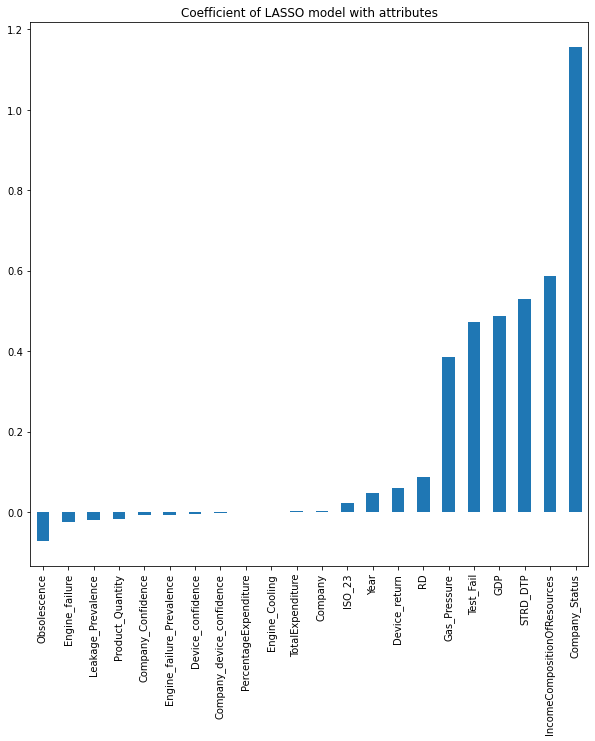

In [30]:
# get the column transformer from Grid Search best estimator
column_transformers = CV.best_estimator_.named_steps['all_column_transformer']
# get feature names for coefficient
features = column_transformers.get_feature_names_out()
feat = []
for f in features:
    # replace the added prefix from column transformer
    feat.append(re.sub('.*\_\_', "", f))

# get the trained model
lasso = CV.best_estimator_.named_steps['model']

plt.figure(figsize=(10,10))
# plot coefficient of all 22 attributes from the model
pd.Series(lasso.coef_, feat).sort_values(ascending = True).plot(kind = "bar")
plt.title('Coefficient of LASSO model with attributes')

#ref: https://www.datacamp.com/tutorial/tutorial-lasso-ridge-regression

From the above bar chart, it shows the model predict mainly with
1. `Company_Status`
2. `IncomeCompositionOfResources`
3. `GDP`
4. `STRD_DTO`
5. `Test_Fail`
6. `Gas_pressure`

Those 6 attributes use more heavily than other attributes, and this result is matched with the heatmap from EDA.

The model would also use `RD`, `Device_return`, `Year` & `ISO_23` as positive relationship and `Obsolescence`, `Engine_failure`, and `Leakage_Prevalence` as negative relationship. However, those attributes does not take much effect as the six attributes mentioned.
From the graph, there are serval attributes with coefficient approximate to 0. They are Company, `TotalExpenditure`, `Engine_Cooling` and `PercentageExpenditure`.

----

## Step 6: Predict with testing data

In [31]:
# use the best estimator (i.e. the whole pipeline) to predict test set
pred = CV.best_estimator_.predict(X_test)

print(f'Root Absolute Square error: {np.sqrt(mean_absolute_error(y_test,pred))}')

Root Absolute Square error: 2.0501191715738787


From the above result, the model has a root-absolute-square error with 2.05. It is a good result as considering guessing a 0-100 value. It only has an average error of 2.
Root-absolute-square is chosen because LASSO use absolute value to predict target value. Choose to root the error because of the measurement.

----

## Conclusion

There is no prefect model for a dataset. Although it generates a low error, there is other area for improving. For example, it would be better to have a specific replacement median value with grouped by `Company` would be better than replaced by a global median value in order to have a better provision for a specific company.

In order to avoid over-fitting, LASSO has been chosen instead of using poly nominal features. Moreover, pipeline was chosen to make the code framework more pretty and make more sense as well as to avoid data leakage in using time series fold. There may be an issue of manual splitting as the dataset was sorted and split by `Year`. However, it makes more sense to use time series split than random split from the dataset as mentioned in EDA.

Another interesting finding is about encoding the attribute `RD`. Before encoding applied to `RD`, it shows a high coefficient with the targeted value. But, the model gets a higher error rate. However, after `RD` has been encoded, the model learns to lower the importance of `RD` and results in a lower error rate keeping other variables unchanged. Therefore, `RD` should not be a dominated attribute in this analysis.

----

In [32]:
# code for generating result
# y_train.append(y_test).reset_index()